### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

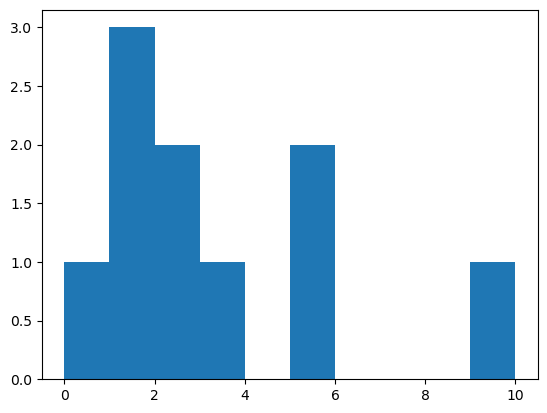

In [9]:
plt.hist(X[1])
plt.show()

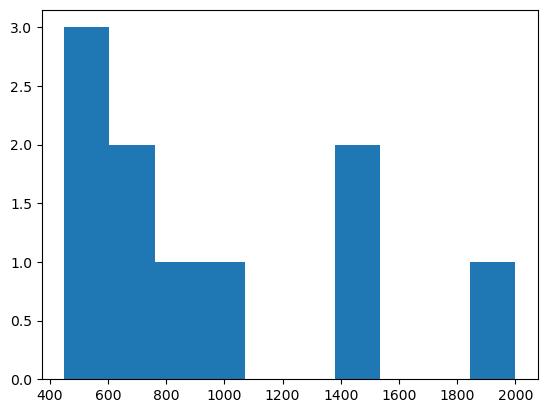

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

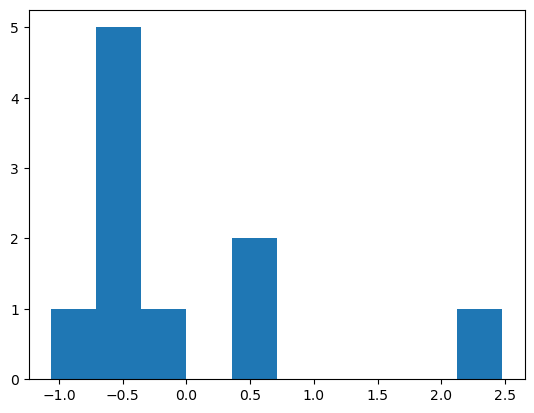

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.0539119   4.81443385  3.66668223  3.82401468] 85.43361208747189
200 [55.5125031   5.28187651  2.88126556  4.23291542] 27.70334186372836
300 [56.3690386   5.56941447  2.25189823  4.60288301] 26.084795881578646
400 [56.48263196  5.75949849  1.75268836  4.93234242] 25.670371316721333
500 [56.49769666  5.8900337   1.35341789  5.21632491] 25.411148828428882
600 [56.49969453  5.98296911  1.03217791  5.45632624] 25.240561224562576
700 [56.49995949  6.0512925   0.77264909  5.65666237] 25.127656026903466
800 [56.49999463  6.10288496  0.56237853  5.82256053] 25.052766829073388
900 [56.49999929  6.14267756  0.3916841   5.95922486] 25.003044581225467
1000 [56.49999991  6.17386592  0.2529321   6.071418  ] 24.970016912168614


array([56.49999991,  6.17386592,  0.2529321 ,  6.071418  ])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50800912  6.02298072  0.68881118  5.7829244 ] 12.597222687794059
1000 [5.65105160e+01 6.23216468e+00 6.87489155e-03 6.28126514e+00] 11.776299001008269
1500 [56.51058194  6.28495541 -0.23134349  6.47472925] 11.464797594661814
2000 [56.51060648  6.3027958  -0.31667629  6.5450523 ] 11.352281237085915
2500 [56.51061536  6.30915474 -0.34735513  6.5703874 ] 11.311865010346612
3000 [56.51061855  6.31143928 -0.35839053  6.5795033 ] 11.297339527004993
3500 [56.5106197   6.31226096 -0.36236033  6.58278274] 11.292116243740152
4000 [56.51062012  6.31255654 -0.36378842  6.58396248] 11.29023751536442
4500 [56.51062027  6.31266287 -0.36430215  6.58438688] 11.289561702976096
5000 [56.51062032  6.31270112 -0.36448696  6.58453955] 11.289318592454007


array([56.51062032,  6.31270112, -0.36448696,  6.58453955])

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [23]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [25]:
n=50
lambdas = np.logspace(-5,2,n)
coeffs = np.zeros((n, X_st.shape[0]))
for i, lambda_ in enumerate(lambdas):
    coeffs[i,:]=eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)

Text(0, 0.5, 'Вес признака')

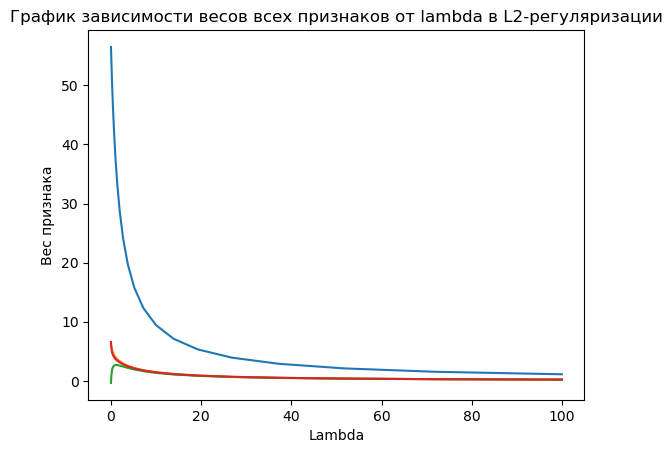

In [26]:
for i in range(X_st.shape[0]):
    plt.plot(lambdas, coeffs[:,i])
plt.title("График зависимости весов всех признаков от lambda в L2-регуляризации")
plt.xlabel("Lambda")
plt.ylabel("Вес признака")

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Это разные методы масштабирования признаков. Применять оба метода одновременно не имеет смысла.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [27]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [28]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])